In [1]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import Tekno as tk
import Types as tp
import numpy as np
import Plot as ptk
from scipy.interpolate import UnivariateSpline
from plotly.graph_objs import Layout, Data, Figure, Marker
from plotly.graph_objs import Scatter3d, Scatter, Histogram
from plotly import tools
from plotly.offline import iplot as iplt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from scipy import optimize
import pickle
import pandas as pd
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
import importlib #for reloading
importlib.reload(tk)
import Tekno as tk

# Parameters

materially and geometrically nonlinear finite element analysis to determine the ultimate load of grid shells

grid shells with various span (L), spen-to-height ratio (L/H), grid density (gN) and pipe cross-section sizes (D, T)

to see results either load previously calculated and saved results or run analyses

In [4]:
runNb=79
LperHA = np.zeros(runNb, dtype=np.int16)
gNA    = np.zeros(runNb, dtype=np.int16)
SpanA  = np.zeros(runNb, dtype=np.int16)
DStart = np.zeros(runNb)
DStep  = np.zeros(runNb)
tStart = np.zeros(runNb, dtype=np.int16)
tStep  = np.zeros(runNb, dtype=np.int16)
FA     = np.zeros(runNb)
Data   = np.zeros((runNb,8), dtype=np.int16)

Data[0]  = 10, 20, 60, 300, 150, 35, 5,  -500*1.5
Data[1]  = 8,  16, 20, 100, 40,  10, 5,  -150
Data[2]  = 6,  16, 40, 200, 150, 15, 10, -400*1.5
Data[3]  = 5,  20, 40, 200, 100, 20, 10, -400*1.5
Data[4]  = 4,  16, 20, 100, 50,  5, 10, -500*1.5
Data[5]  = 3,  24, 60, 300, 150, 20, 10, -500*1.5

Data[6]  = 10, 16, 30, 200, 100, 15, 10, -220*1.5
Data[7]  = 8,  16, 40, 200, 150, 15, 10, -500*1.5
Data[8]  = 6,  20, 50, 350, 80, 20, 10, -500*1.5
Data[9]  = 5,  24, 50, 300, 100, 20, 10, -500*1.5
Data[10] = 4,  20, 40, 200, 100, 20, 10, -230*1.5
Data[11] = 3,  18, 30, 150, 50, 15, 10, -400*1.5

Data[12] = 10, 10, 30, 200, 100, 15, 10, -360*1.5
Data[13] = 8,  12, 40, 300, 100, 20, 10, -500*1.5
Data[14] = 6,  12, 50, 250, 150, 25, 10, -950
Data[15] = 5,  14, 50, 200, 150, 25, 10, -600*1.5
Data[16] = 4,  8,  40, 300, 100, 30, 10, -2000  # FELKEMENYEDIK
Data[17] = 3,  8,  30, 100, 100, 30, 10, -1100*1.5 # FELKEMENYEDIK 

Data[18] = 10, 20, 20, 100, 40,  10, 10, -100
Data[19] = 8,  12, 30, 300, 50,  20, 10, -700*1.5
Data[20] = 6,  12, 40, 200, 100, 25, 10, -900*1.5
Data[21] = 5,  12, 20, 100, 70,  10, 10, -500*1.5
Data[22] = 4,  20, 60, 300, 150, 20, 10, -420*1.5
Data[23] = 3,  12, 60, 200, 150, 25, 10, -700*1.5  # FELKEMENYEDIK

Data[24] = 10, 16, 20, 110, 40,  10, 5,  -150
Data[25] = 8,  20, 50, 300, 100, 20, 10, -500*1.5
Data[26] = 6,  18, 60, 350, 150, 20, 10, -460*1.5
Data[27] = 5,  16, 60, 300, 150, 30, 10, -900*1.5
Data[28] = 4,  16, 60, 300, 150, 30, 10, -660*1.5
Data[29] = 3,  18, 60, 200, 150, 20, 10, -400*1.5

Data[30]  = 10, 20, 60, 300, 100, 25, 5,  -600
Data[31]  = 8,  16, 20, 100, 50,  15, 5,  -500*1.5
Data[32]  = 6,  16, 40, 200, 50,  20, 10, -900*1.5
Data[33]  = 5,  20, 40, 200, 50,  25, 10, -500*1.5
Data[34]  = 4,  16, 20, 100, 25,  10, 10, -500*1.5
Data[35]  = 3,  24, 60, 250, 100, 30, 10, -500*1.5

Data[36]  = 10, 20, 40, 200, 100, 25, 5,  -500*1.5
Data[37]  = 8,  16, 60, 250, 150, 25, 5,  -500*1.5
Data[38]  = 6,  16, 20, 100, 50,  10, 10, -900*1.5
Data[39]  = 5,  20, 20, 100, 50,  10, 10, -500*1.5
Data[40]  = 4,  16, 40, 200, 150, 10, 10, -500*1.5
Data[41]  = 3,  24, 20, 80,  50, 5, 10,   -100

Data[42]  = 10, 14, 20, 100, 50, 10, 5,  -80*1.5
Data[43]  = 8,  14, 20, 100, 50, 10, 5,  -80*1.5
Data[44]  = 6,  14, 20, 100, 50, 10, 10, -80*1.5
Data[45]  = 5,  14, 20, 100, 50, 10, 10, -80*1.5
Data[46]  = 4,  14, 20, 100, 50, 10, 10, -300*1.5
Data[47]  = 3,  14, 20, 100, 50, 10, 10, -150*1.5

Data[48]  = 8,  10, 20, 100, 50, 10, 5,  -95*1.5
Data[49]  = 8,  12, 20, 100, 50, 10, 5,  -80*1.5
Data[50]  = 8,  14, 20, 100, 50, 10, 10, -70*1.5
Data[51]  = 8,  16, 20, 100, 50, 10, 10, -60*1.5
Data[52]  = 8,  18, 20, 100, 50, 10, 10, -50*1.5
Data[53]  = 8,  20, 20, 100, 50, 10, 10, -300*1.5

Data[54]  = 10, 14, 40, 250, 110, 15, 5,  -500
Data[55]  = 8,  14, 40, 200, 150, 10, 5,  -250*1.5
Data[56]  = 6,  14, 40, 200, 150, 10, 10, -250*1.5
Data[57]  = 5,  14, 40, 200, 150, 10, 10, -500*1.5
Data[58]  = 4,  14, 40, 200, 150, 10, 10, -500*1.5
Data[59]  = 3,  14, 40, 200, 150, 10, 10, -500*1.5

Data[60]  = 10, 18, 20, 100, 50,  10, 5,  -500*1.5
Data[61]  = 8,  18, 60, 250, 150, 35, 5,  -600*1.5
Data[62]  = 6,  18, 20, 100, 50,  10, 10, -500*1.5
Data[63]  = 5,  18, 20, 100, 50,  10, 10, -550*1.5
Data[64]  = 4,  18, 20, 100, 50,  10, 10, -500*1.5
Data[65]  = 3,  16, 60, 250, 150, 35, 10, -700*1.5

Data[66]  = 10, 14, 60, 250, 150, 35, 5,  -600*1.5
Data[67]  = 8,  14, 60, 250, 150, 35, 5,  -600*1.5
Data[68]  = 6,  14, 60, 250, 150, 35, 10, -900*1.5
Data[69]  = 5,  14, 60, 250, 150, 35, 10, -900*1.5
Data[70]  = 4,  14, 60, 250, 150, 35, 10, -900*1.5
Data[71]  = 3,  14, 60, 250, 150, 35, 10, -1100*1.5

Data[72]  = 10, 18, 40, 200, 100, 20, 5,  -180*1.5
Data[73]  = 8,  18, 40, 200, 100, 20, 5,  -200*1.5
Data[74]  = 6,  18, 40, 200, 100, 20, 10, -500*1.5
Data[75]  = 5,  18, 40, 200, 100, 20, 10, -250*1.5
Data[76]  = 4,  18, 40, 200, 100, 15, 10, -500*1.5
Data[77]  = 3,  16, 40, 200, 100, 20, 10, -500*1.5

Data[78]  = 10,  20, 40, 200, 100, 20, 10, -500*1.5

for i in range(runNb):
    LperHA[i],gNA[i],SpanA[i],DStart[i],DStep[i],tStart[i],tStep[i],FA[i] = Data[i,0],Data[i,1],Data[i,2],Data[i,3],Data[i,4],Data[i,5],Data[i,6],Data[i,7]

In [5]:
MatNL = True
n=4 # mm CHS cross-section diameter
m=1 # mm CHS cross-section thickness
nb = 4   # number of finite elements along one beam

In [6]:
size = 100
GRSA       = np.zeros(size, dtype=tp.GridShell)
CapacityFA = np.zeros((size, n*m))
CapacityA  = np.zeros((size, n*m))
rhoAA      = np.zeros((size, n*m))
IDA        = np.zeros(size, dtype=np.int16)
etaA       = np.zeros((size, n*m)) 
loadAA     = np.zeros((size, n*m, 201))
dispA      = np.zeros((size, n*m, 201))

     L  g  LpH   Lav  L/Lav
----------------------------
 0: 60  20  10   4.7  12.7  2221
 1: 20  16   8   2.0  10.2  1457
 2: 40  16   6   4.0  10.0  1457
 3: 40  20   5   3.3  12.3  2221
 4: 20  16   4   2.1   9.6  1457
 5: 60  24   3   4.4  13.6  3145

 6: 30  16  10   2.9  10.2  1457
 7: 40  16   8   3.9  10.2  1457
 8: 50  20   6   4.0  12.4  2221
 9: 50  24   5   3.4  14.6  3145
10: 40  20   4   3.3  11.9  2221
11: 30  18   3   2.9  10.3  1819

12: 30  10  10   4.6   6.6   611
13: 40  12   8   5.2   7.7   853
14: 50  12   6   6.6   7.6   853
15: 50  14   5   5.7   8.7  1135
16: 40   8   4   7.9   5.0   409
17: 30   8   3   6.2   4.8   409

18: 20  20  10   1.6  12.7  2221
19: 30  12   8   3.9   7.7   853
20: 40  12   6   5.2   7.6   853
21: 20  12   5   2.7   7.5   853
22: 60  20   4   5.0  11.9  2221
23: 60  12   3   8.6   7.0   853

24: 20  16  10   2.0  10.2  1457
25: 50  20   8   4.0  12.6  2221
26: 60  18   6   5.3  11.2  1819
27: 60  16   5   6.1   9.9  1457
28: 60  16   4 

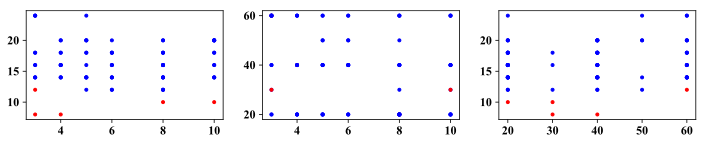

In [16]:
print('     L  g  LpH   Lav  L/Lav')
print('----------------------------')
for i in range(runNb):
    lavtemp,nn = tk.calclav2(SpanA[i],LperHA[i],gNA[i])
    print('{:2d}: {:.0f}  {:2.0f}  {:2.0f}  {:4.1f}  {:4.1f}  {:4d}'.format(i,SpanA[i],gNA[i],LperHA[i],lavtemp,SpanA[i]/lavtemp,nn))
    if i%6==5: print()
plt.figure(figsize=(12,2))
plt.subplot(131)
for i in range(runNb): 
    if SpanA[i]/tk.calclav(SpanA[i],LperHA[i],gNA[i])>7.05: plt.plot(LperHA[i],gNA[i],'bo', ms=3) # 
    else: plt.plot(LperHA[i],gNA[i],'ro', ms=3) # 
plt.subplot(132)
for i in range(runNb): 
    if SpanA[i]/tk.calclav(SpanA[i],LperHA[i],gNA[i])>7.05: plt.plot(LperHA[i],SpanA[i],'bo', ms=3) # 
    else: plt.plot(LperHA[i],SpanA[i],'ro', ms=3) # 
plt.subplot(133)
for i in range(runNb): 
    if SpanA[i]/tk.calclav(SpanA[i],LperHA[i],gNA[i])>7.05: plt.plot(SpanA[i],gNA[i],'bo', ms=3) # 
    else: plt.plot(SpanA[i],gNA[i],'ro', ms=3) # 
plt.show()

# Load results

In [10]:
ga = pickle.load( open( mainpath+"/Saved results/GRSA_OldalnyomasmentesALL_Geom1.p", "rb" ) )
with pd.HDFStore(mainpath+'/Saved results/OldalnyomasmentesALL_Geom1.h5') as store:
    ca = store['CapacityA']
    cf = store['CapacityFA']
    rh = store['rhoAA']
    et = store['etaA']
    l1 = store['loadA1']
    l2 = store['loadA2']
    l3 = store['loadA3']
    l4 = store['loadA4']
    d1 = store['dispA1']
    d2 = store['dispA2']
    d3 = store['dispA3']
    d4 = store['dispA4']

In [11]:
size = 100
GRSA  = ga
CapacityA  = ca.values
CapacityFA = cf.values
rhoAA      = rh.values
etaA       = et.values
loadAA     = np.zeros((size, n*m, 201))
loadAA[:,0,:]  = l1.values
loadAA[:,1,:]  = l2.values
loadAA[:,2,:]  = l3.values
loadAA[:,3,:]  = l4.values
dispA      = np.zeros((size, n*m, 201))
dispA[:,0,:]   = d1.values
dispA[:,1,:]   = d2.values
dispA[:,2,:]   = d3.values
dispA[:,3,:]   = d4.values

# Analysis

In [177]:
# LARGE
for i in [0]:
    GRSA[i], CapacityFA[i], CapacityA[i], rhoAA[i], etaA[i], loadAA[i], dispA[i] = tk.loop_analyse2(n, m, LperHA[i], gNA[i], SpanA[i], nb, FA[i], DStart[i], DStep[i], tStart[i], tStep[i],1,2,steps=200,msz=0.001)

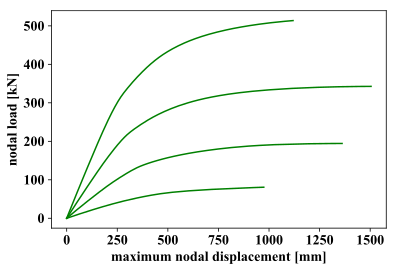

In [12]:
j=0
for i in range(n*m):
    plot = plt.plot(dispA[j,i],loadAA[j,i],'g') # dot plot
plot = plt.xlabel('maximum nodal displacement [mm]')
plot = plt.ylabel('nodal load [kN]')

0 [ 0.48806453  1.17603349  2.07329955]
6 [ 0.9656543   2.14058262  3.67418253]
18 [ 0.53516967  1.04850581  1.71889452  2.52177308]
24 [ 0.6495953   1.22114311  1.93767914  2.7959014 ]
30 [ 0.52082901  0.97556196  1.4989713   2.1391156 ]


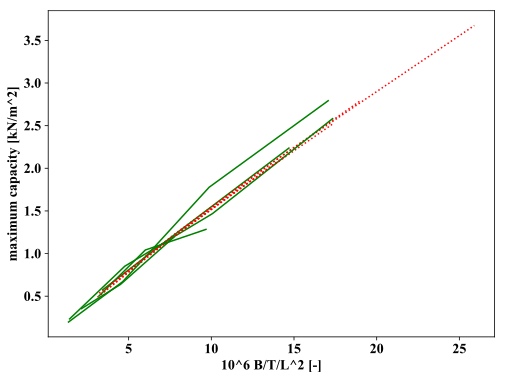

In [13]:
plt.figure(figsize=(8,6))
c=[1,1.16,1.33,1.4,1.52,1.55]
for i in range(36):
    if GRSA[i]!=0 and GRSA[i].span/GRSA[i].height==10:
        if GRSA[i].span/GRSA[i].Lav>7:
            jmax=4
            for j in range(4):
                if CapacityA[i,j]>20: jmax=j
            plt.plot(rhoAA[i,:jmax]*1e6,CapacityFA[i,:jmax]/GRSA[i].Lav/GRSA[i].secT/1000,'r:', ms=0) # 
            print(i,CapacityFA[i,:jmax]/GRSA[i].Lav/GRSA[i].secT/1000)
    if GRSA[i]!=0 and GRSA[i].span/GRSA[i].height==3:
        if GRSA[i].span/GRSA[i].Lav>7:
            jmax=4
            for j in range(4):
                if CapacityA[i,j]>20: jmax=j
            plt.plot(rhoAA[i,:jmax]*1e6,CapacityFA[i,:jmax]/GRSA[i].Lav/GRSA[i].secT/1000/c[i%6],'g', ms=0) # 
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity [kN/m^2]')
plt.show()

# Viewer

In [14]:
i=43
iplt(ptk.PlotGeom(GRSA[i], 0))

# Reference

In [15]:
mar = ['o', '<', 'D', 'v', 'X', '>','s']
LperHAord=np.array([LperHA[0],LperHA[1], LperHA[2], LperHA[3], LperHA[4], LperHA[5]])
c=np.zeros(6)
for i in range(6):
    c[i]=-0.082*LperHAord[i]+1.82 #knock-down factor for span-to-height ratio
Cmax=20
Cmin=3
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [0, 158, 115]] # bluish green
c3=[c/255. for c in [240, 228, 66]]  # yellow
c4=[c/255. for c in [0, 114, 178]]   # blue
c5=[c/255. for c in [204, 121, 167]] # reddish purple
c6=[c/255. for c in [86, 180, 233]] # sky blue
#c1=[c/255. for c in [230, 159, 0]]   # orange
col=[c1,c2,c3,c4,c5,c6]

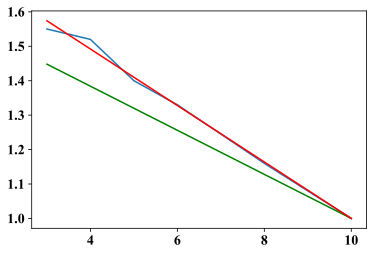

In [17]:
plt.plot(LperHAord, [1,1.16,1.33,1.4,1.52,1.55])
plt.plot(LperHAord, fff(LperHAord,-0.064,1.64),'g')
plt.plot(LperHAord, fff(LperHAord,-0.082,1.82),'r')

210
[ 0.157]


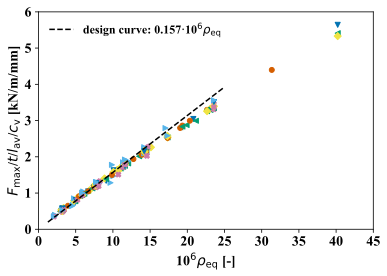

In [18]:
fig = plt.figure(figsize=(6, 4))
#gs = gridspec.GridSpec(1, 2)

rr=runNb-1

#ax1 = plt.subplot(gs[0, 0])
#for i in range(rr):
#    jmax=4
#    for j in range(4):
#        if CapacityA[i,j]>20: jmax=j
#    if GRSA[i].span/GRSA[i].Lav>=7: plt.plot(rhoAA[i,:jmax] *1e6, CapacityFA[i,:jmax] /GRSA[i].secT/1000 / GRSA[i].Lav, color=col[i%6], marker='o',linestyle='-', ms=2)
#    #else: plt.plot(rhoAA[i,:jmax] *1e6, CapacityFA[i,:jmax] /GRSA[i].secT/1000 / GRSA[i].Lav, color=col[i%6], marker='o',linestyle='--', ms=2, fillStyle='none')
    
#plt.xlabel('$\\rho_{\\rm eq}=B/T/L^2$ $10^6$ [-]')
#plt.ylabel('$F_{\\rm max}$/$t$/$l_{\\rm av}$ [kN/m/mm]')
#plt.xlim(0,45)
#plt.ylim(0,8)
#plt.xticks(np.arange(0,45.1,5))
c_patch = mpatches.Patch(color=c6, label='L/H=3')
m_patch = mpatches.Patch(color=c5, label='L/H=4')
b_patch = mpatches.Patch(color=c4, label='L/H=5')
y_patch = mpatches.Patch(color=c3, label='L/H=6')
g_patch = mpatches.Patch(color=c2, label='L/H=8')
r_patch = mpatches.Patch(color=c1, label='L/H=10')
#plt.legend(handles=[c_patch,m_patch,b_patch,y_patch,g_patch,r_patch],frameon=False,loc=2)

#ax2 = plt.subplot(gs[0, 1])   
refx=np.zeros(rr*4+1)
refy=np.zeros(rr*4+1)
k=0
for i in range(rr):
    for j in range(n*m):
        if CapacityA[i,j]>=Cmin and CapacityA[i,j]<=Cmax:
            if GRSA[i].span/GRSA[i].Lav>=7:
                cc=c[(i)%6]
                if i in range(48,54): cc=c[1] #L/H=8
                k+=1
                refx[k]=rhoAA[i,j]
                refy[k]=CapacityFA[i,j] /GRSA[i].secT/1000 / GRSA[i].Lav /cc
                plt.plot(rhoAA[i,j] *1e6, CapacityFA[i,j] /GRSA[i].secT/1000 / GRSA[i].Lav /cc, color=col[i%6], marker=mar[i%6], ms=5) 
         
print(k)
keys=np.argsort(refx)
refx=refx[keys]
refy=refy[keys]

def linf(x, a1):
    return a1*x

params, params_covariance = optimize.curve_fit(linf, refx* 1e6, refy)
refxlin=np.linspace(0,25,100)
params[0]=0.157 #az illesztessel nagyon magas lett az atlaghiba, vszleg a nagy rho ertekek miatt
plt.plot(refxlin[5:],linf(refxlin[5:],params[0]),'k--')
print(params)

plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$F_{\\rm max}$/$t$/$l_{\\rm av}$/$c_{\\rm v}$ [kN/m/mm]')
plt.xlim(0,45)
plt.ylim(0,6)
plt.xticks(np.arange(0,45.1,5))

ref_ln = mlines.Line2D([], [], color='k', label='design curve: 0.157$\cdot$10$^6\\rho_{\\rm eq}}$',linestyle='--')
plt.legend(handles=[ref_ln],frameon=False,loc=2,fontsize=12)
#plt.text(39, 0.25, 'perfect')

plt.savefig('G1pOM.pdf', bbox_inches='tight')

plt.show()

# Hiba

In [19]:
iplt(tk.calc_error_Omentes(GRSA,rhoAA,CapacityA,refx,linf(refx* 1e6,params[0]),detailOn=False,runNb=runNb-1))

Max error:        18.6%
Min error:        -13.5%
Average error:     3.6%
210


# Save results

In [42]:
pickle.dump(GRSA, open(mainpath+"/Saved results/GRSA_OldalnyomasmentesALL_Geom1.p", "wb" ) )

In [43]:
A_df  = pd.DataFrame(CapacityA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
B_df  = pd.DataFrame(CapacityFA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
C_df  = pd.DataFrame(rhoAA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
D_df  = pd.DataFrame(etaA, columns=('sec1', 'sec2', 'sec3', 'sec4'))
E_df1 = pd.DataFrame(loadAA[:,0,:]) #sec1
E_df2 = pd.DataFrame(loadAA[:,1,:]) #sec2
E_df3 = pd.DataFrame(loadAA[:,2,:]) #sec3
E_df4 = pd.DataFrame(loadAA[:,3,:]) #sec4
F_df1 = pd.DataFrame(dispA[:,0,:])  #sec1
F_df2 = pd.DataFrame(dispA[:,1,:])  #sec2
F_df3 = pd.DataFrame(dispA[:,2,:])  #sec3
F_df4 = pd.DataFrame(dispA[:,3,:])  #sec4
G_df  = pd.DataFrame(refxlin)
H_df  = pd.DataFrame(linf(refxlin,params[0]))

with pd.HDFStore(mainpath+'/Saved results/OldalnyomasmentesALL_Geom1.h5') as store:
    store['CapacityA'] = A_df
    store['CapacityFA']= B_df
    store['rhoAA']     = C_df
    store['etaA']      = D_df
    store['loadA1']    = E_df1
    store['loadA2']    = E_df2
    store['loadA3']    = E_df3
    store['loadA4']    = E_df4
    store['dispA1']    = F_df1
    store['dispA2']    = F_df2
    store['dispA3']    = F_df3
    store['dispA4']    = F_df4
    store['refx']      = G_df
    store['refy']      = H_df